In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\User\OneDrive\Belgeler\07-02-24 Instacart Basket Analysis'

In [3]:
path

'C:\\Users\\User\\OneDrive\\Belgeler\\07-02-24 Instacart Basket Analysis'

In [4]:
merged_df_no_dups=pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'merged_all.pkl'))

In [5]:
df_prods = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'products[1].csv'), index_col = False)

In [6]:
df_dep_t_new = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [7]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [8]:
merged_df_no_dups.head()

,user_id,first_name,surname,gender,state,age,date_joined,dependants,family_status,income,order_id,order_number,orders_day_of_week,time_of_placing_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_period_of_day,mean_product_price,max_order,loyalty_flag,spending_flag,median_days_between_orders,order_frequency
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,7.988889,8,New customer,Low spender,19.0,Regular customer
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy days,Most orders,7.988889,8,New customer,Low spender,19.0,Regular customer
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,both,Mid-range product,Busiest days,Most orders,7.988889,8,New customer,Low spender,19.0,Regular customer
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Regularly busy days,Most orders,7.988889,8,New customer,Low spender,19.0,Regular customer
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,both,Mid-range product,Two slowest days,Most orders,7.988889,8,New customer,Low spender,19.0,Regular customer


In [9]:
# Creating crosstab 
crosstab = pd.crosstab(merged_df_no_dups['days_since_prior_order'], merged_df_no_dups['order_number'], dropna = False)

In [10]:
# copy crosstab to cliboard to past it to excel
crosstab.to_clipboard()

In [11]:
# Fix formatting to remove scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [12]:
merged_df_no_dups.describe()

,user_id,age,dependants,income,order_id,order_number,orders_day_of_week,time_of_placing_order,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,mean_product_price,max_order,median_days_between_orders
count,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00,22373686.00
mean,70942.48,49.49,1.51,99371.18,1710935.81,17.13,2.74,13.43,10.84,25578.41,8.35,0.59,71.23,9.92,11.73,11.73,33.03,9.75
std,40889.32,18.47,1.12,43107.63,987482.13,17.51,2.09,4.25,8.55,14097.65,7.13,0.49,38.20,6.28,471.72,79.15,25.10,6.35
min,1.00,18.00,0.00,25903.00,6.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,1.00,1.00,1.00,3.00,0.00
25%,35572.00,33.00,1.00,66984.00,855863.25,5.00,1.00,10.00,5.00,13535.00,3.00,0.00,31.00,4.00,4.20,7.39,13.00,6.00
50%,70873.00,49.00,2.00,96570.00,1710741.00,11.00,3.00,13.00,7.00,25266.00,6.00,1.00,83.00,9.00,7.40,7.83,26.00,7.00
75%,106179.00,65.00,3.00,127831.00,2566526.00,24.00,5.00,16.00,14.00,37940.00,11.00,1.00,107.00,16.00,11.30,8.26,47.00,12.00
max,142100.00,81.00,3.00,593901.00,3421083.00,99.00,6.00,23.00,30.00,49688.00,145.00,1.00,134.00,21.00,99999.00,25005.42,99.00,30.00


In [13]:
import gc
gc.collect

<function gc.collect(generation=2)>

#1.Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

Answer: All done.

In [14]:
merged_df_no_dups = merged_df_no_dups.drop(columns=['first_name', 'surname'])

#2.Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

Answer:The security implications involve handling Personally Identifiable Information (PII), such as first and last names, which can be excluded if necessary. I have already excluded columns first_name and surname.


#3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [15]:
#Create a list hold,ng True/False values to test np.random.rand <= 0.7
np.random.seed(4)
dev = np.random.rand(len(merged_df_no_dups)) <= 0.7

In [16]:
# Store 70% of the sample in dataframe big
big = merged_df_no_dups[dev]

In [17]:
# Store 30% of the sample in dataframe small
small = merged_df_no_dups[~dev]

In [18]:
small.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6711177 entries, 0 to 22374533
Data columns (total 30 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   user_id                     int64   
 1   gender                      object  
 2   state                       object  
 3   age                         int64   
 4   date_joined                 object  
 5   dependants                  int64   
 6   family_status               object  
 7   income                      int64   
 8   order_id                    int64   
 9   order_number                int64   
 10  orders_day_of_week          int64   
 11  time_of_placing_order       int64   
 12  days_since_prior_order      float64 
 13  product_id                  int64   
 14  add_to_cart_order           int64   
 15  reordered                   int64   
 16  product_name                object  
 17  aisle_id                    int64   
 18  department_id               int64   
 19  pric

In [19]:
small = small.copy()

In [20]:
# Create a "Region" column based on the "State" column
small['region'] = 'West'  # Set default region

# Map states to regions using loc function with mapping
small.loc[small['state'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']), 'region'] = 'Northeast'
small.loc[small['state'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']), 'region'] = 'Midwest'
small.loc[small['state'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']), 'region'] = 'South'


In [21]:
small['region'].value_counts(dropna = False)

region
South        2240503
West         1713324
Midwest      1574610
Northeast    1182740
Name: count, dtype: int64

In [22]:
small['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     6583242
High spender     127935
Name: count, dtype: int64

In [23]:
spend_by_region = pd.crosstab(small['region'], small['spending_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [24]:
spend_by_region # Spending by region

spending_flag,High spender,Low spender
region,,
South,42990,2197513
Midwest,32364,1542246
West,32008,1681316
Northeast,20573,1162167


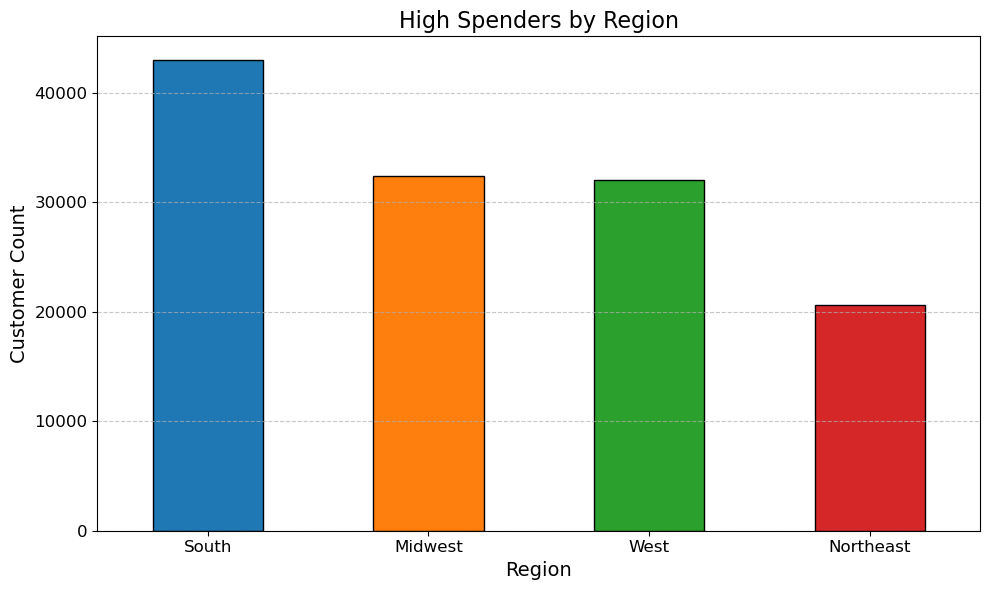

In [25]:
# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # These are the default colors from the matplotlib color cycle

# Create a larger figure size
plt.figure(figsize=(10, 6))

# Creating bar chart for high spenders and saving it as an object
bar_regional_high_spenders = spend_by_region['High spender'].plot(kind='bar', edgecolor='black', color=colors)


# Add a title and axis labels
plt.title('High Spenders by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)

# Customize tick labels rotation
plt.xticks(rotation=0)

# Customize tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



In [26]:
# Saving as png
bar_regional_high_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_high_spenders.png'))

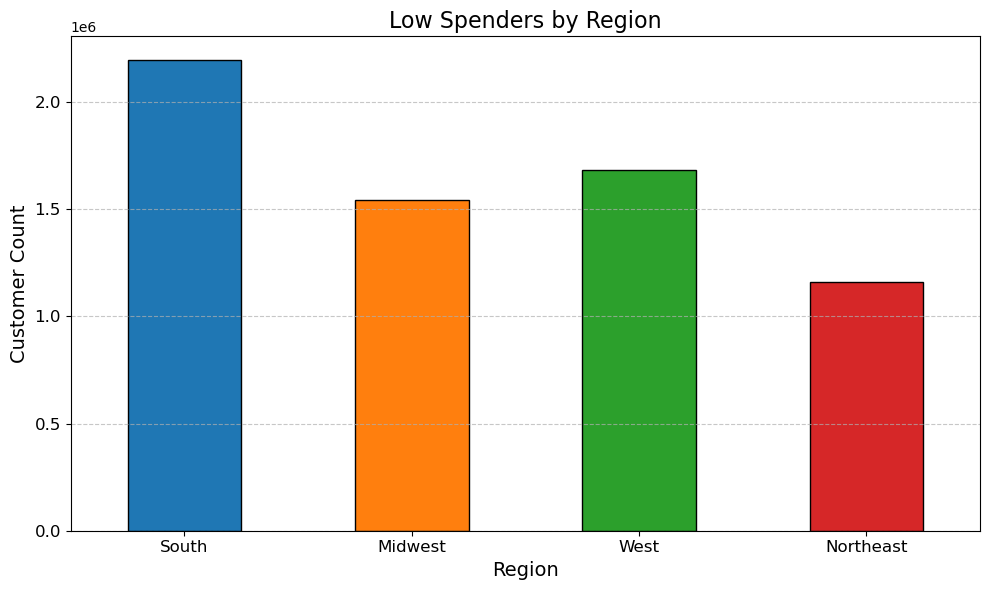

In [27]:
# Define custom colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # These are the default colors from the matplotlib color cycle

# Create a larger figure size
plt.figure(figsize=(10, 6))

# Creating bar chart for high spenders and saving it as an object
bar_regional_low_spenders = spend_by_region['Low spender'].plot(kind='bar', edgecolor='black', color=colors)


# Add a title and axis labels
plt.title('Low Spenders by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Customer Count', fontsize=14)

# Customize tick labels rotation
plt.xticks(rotation=0)

# Customize tick labels font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()



In [28]:
# Saving as png
bar_regional_low_spenders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_regional_low_spenders.png'))

Comment:

South: The region exhibits the greatest contrast between high and low spenders, reflecting its economic disparities. Businesses must tailor strategies to address both affluent consumers and those in less prosperous areas, ensuring relevance across the spectrum.

Midwest: With moderate spending levels and minimal variation, the Midwest showcases economic stability. Marketing efforts should focus on themes of reliability and consistency to resonate with the region's dependable spending patterns.

West: Characterized by a significant presence of both high and low spenders, the West mirrors a diverse economic landscape. Marketing strategies should target both high-income individuals seeking premium products and budget-conscious consumers prioritizing affordability.

Northeast: This region has the lowest proportion of both high and low spenders, indicating generally restrained spending habits. The higher cost of living and potential economic challenges suggest that businesses should highlight value and affordability in their messaging to appeal to consumers.

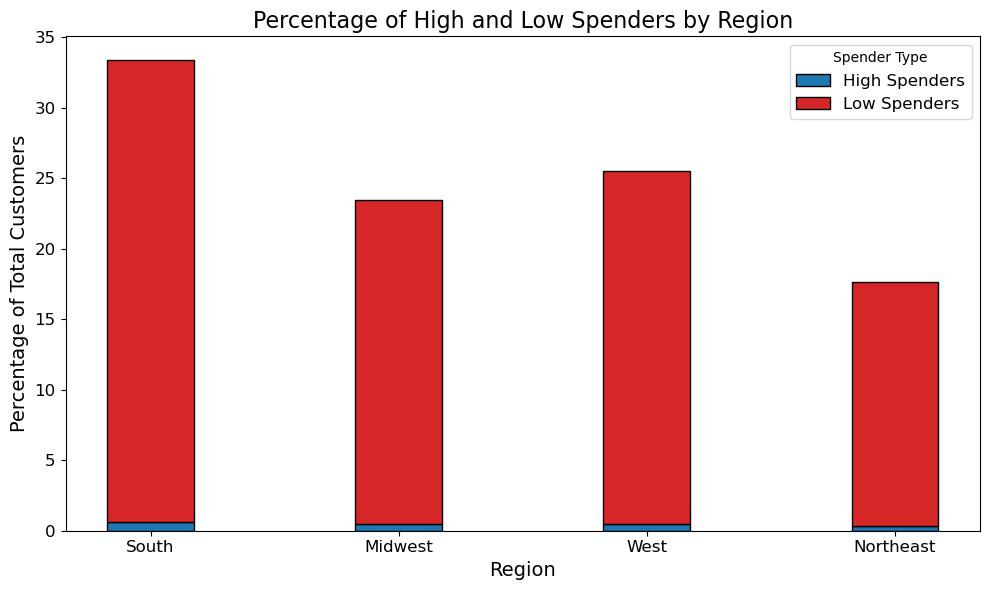

In [29]:
# Calculate total number of customers
total_customers = spend_by_region['High spender'].sum() + spend_by_region['Low spender'].sum()

# Calculate percentages of high and low spender counts
percent_high_spenders = (spend_by_region['High spender'] / total_customers) * 100
percent_low_spenders = (spend_by_region['Low spender'] / total_customers) * 100

# Define the number of regions
num_regions = len(spend_by_region['High spender'].index)

# Set the width of the bars
bar_width = 0.35

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Define the x locations for the bars
x = range(num_regions)

# Plot the bars for high spenders
bar_high_spenders = ax.bar(x, percent_high_spenders, bar_width, edgecolor='black', color='#1f77b4', label='High Spenders')

# Plot the bars for low spenders on top of the high spenders
bar_low_spenders = ax.bar(x, percent_low_spenders, bar_width, bottom=percent_high_spenders, edgecolor='black', color='#d62728', label='Low Spenders')

# Add title and axis labels
plt.title('Percentage of High and Low Spenders by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Percentage of Total Customers', fontsize=14)

# Customize tick labels and font size
plt.xticks(x, spend_by_region['High spender'].index, rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Customize legend
ax.legend(title='Spender Type', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [30]:
# Saving as png
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'percentage_of_high_and_low_spenders_by_region.png'))

#4.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [31]:
#creating exclusion flag
merged_df_no_dups['exclusion_flag'] = merged_df_no_dups['max_order'] < 5

In [32]:
# Creating new data set with orders <5
df_order_less_5 = merged_df_no_dups[merged_df_no_dups['exclusion_flag']]

In [33]:

df_exclusion = merged_df_no_dups.loc[~merged_df_no_dups['exclusion_flag']]
low_activity = merged_df_no_dups.loc[merged_df_no_dups['exclusion_flag']]


In [34]:
# Export the exclusion sample (customers with >=5 orders)
df_exclusion.to_csv('df_exclusion.csv', index=False)

# Export the low-activity sample (customers with <5 orders)
low_activity.to_csv('low_activity.csv', index=False)

In [35]:
def exclude_low_activity(df, order_col, threshold=5):
    df['exclusion_flag'] = df[order_col] < threshold
    filtered_df = df.loc[~df['exclusion_flag']].drop(columns=['exclusion_flag'])
    return filtered_df

In [36]:
# Apply the function to exclude low-activity customers
merged_df_no_dups = exclude_low_activity(merged_df_no_dups, 'max_order')

MemoryError: Unable to allocate 1.59 GiB for an array with shape (10, 21378534) and data type int64

In [37]:
low_activity.shape


(995152, 31)

In [38]:
df_exclusion .shape

(21378534, 31)

In [39]:
df_exclusion ['max_order'].describe()

count   21378534.00
mean          34.40
std           24.84
min            5.00
25%           14.00
50%           28.00
75%           48.00
max           99.00
Name: max_order, dtype: float64

#5.The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

#6.Create an appropriate visualization to show the distribution of profiles.

#7.Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [40]:
merged_df_no_dups['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    10965428
Loyal customer       7104497
New customer         4303761
Name: count, dtype: int64

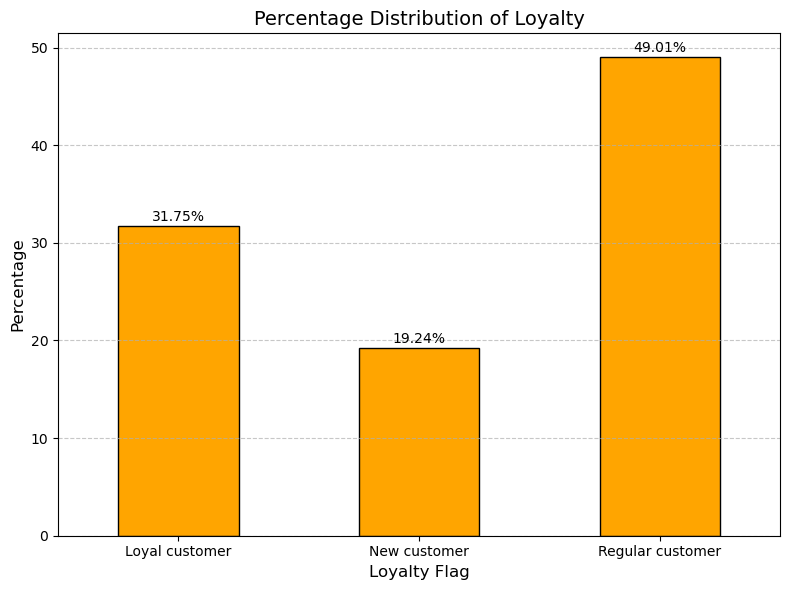

In [41]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (merged_df_no_dups['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))  # Set figure size
loyalty_distribution.plot(kind='bar', color='orange', edgecolor='black')  # Plotting the bar chart

# Adding labels and title
plt.xlabel('Loyalty Flag', fontsize=12)  # Label for the x-axis
plt.ylabel('Percentage', fontsize=12)  # Label for the y-axis
plt.title('Percentage Distribution of Loyalty', fontsize=14)  # Title of the plot

# Adding percentage labels on top of each bar
for index, value in enumerate(loyalty_distribution):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontsize=10)

# Adding grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotating x-axis labels for better readability
plt.xticks(rotation=0)

# Save the plot as an image file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_distribution.png'))

# Displaying the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

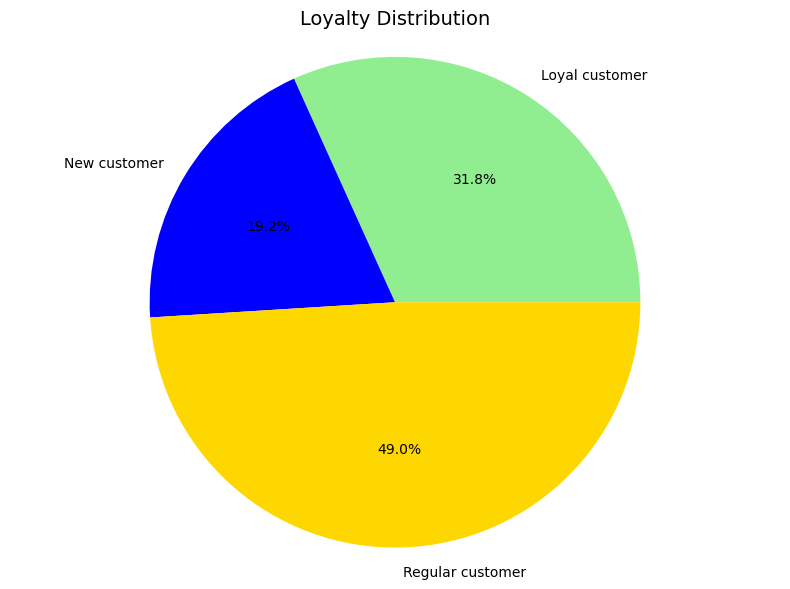

In [42]:
# Calculate percentage distribution of loyalty
loyalty_distribution = (merged_df_no_dups['loyalty_flag'].value_counts(normalize=True) * 100).sort_index()

# Plotting the pie chart
plt.figure(figsize=(8, 6))  # Set figure size
loyalty_pie = plt.pie(loyalty_distribution, labels=loyalty_distribution.index, autopct='%1.1f%%', colors=['lightgreen', 'blue', 'gold'])  # Plotting the pie chart

# Adding title
plt.title('Loyalty Distribution', fontsize=14)  # Title of the pie chart

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Save the pie chart as an image file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

# Displaying the pie chart
plt.tight_layout()  # Adjust layout
plt.show()

In [43]:
#Create profiling variables
#creating age profiling variable
#young adult=< 25, adult 25-45, older adult 45-65, senior 65+

In [44]:
merged_df_no_dups.loc[merged_df_no_dups['age'] <= 25, 'age_group'] = 'Young Adult'
merged_df_no_dups.loc[(merged_df_no_dups['age'] > 25) & (merged_df_no_dups['age'] < 45), 'age_group'] = 'Adult'
merged_df_no_dups.loc[(merged_df_no_dups['age'] >= 45) & (merged_df_no_dups['age'] < 65), 'age_group'] = 'Older Adult'
merged_df_no_dups.loc[merged_df_no_dups['age'] >= 65, 'age_group'] = 'Senior'

In [45]:
merged_df_no_dups['age_group'].value_counts(dropna=False)

age_group
Older Adult    7020488
Adult          6648309
Senior         5922488
Young Adult    2782401
Name: count, dtype: int64

In [47]:
merged_df_no_dups.groupby('age_group').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
Adult                        10.86 0.00 30.00
Older Adult                  10.87 0.00 30.00
Senior                       10.81 0.00 30.00
Young Adult                  10.81 0.00 30.00

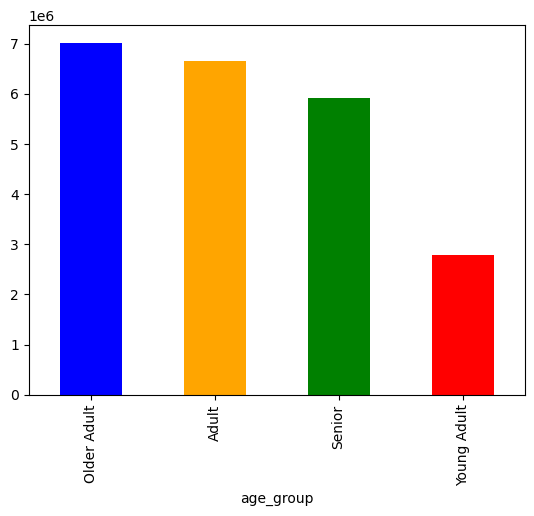

In [48]:
#age profile bar chart
bar = merged_df_no_dups['age_group'].value_counts().plot.bar(color=['blue', 'orange', 'green', 'red'])


In [49]:
# Saving as png
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

In [50]:
#creating income profiling variable
#Based on low, middle and high income brackets

In [51]:
merged_df_no_dups.loc[merged_df_no_dups['income'] <= 50000, 'Income_group'] = 'Low'
merged_df_no_dups.loc[(merged_df_no_dups['income'] > 50000) & (merged_df_no_dups['income'] <= 100000), 'Income_group'] = 'Middle'
merged_df_no_dups.loc[merged_df_no_dups['income'] > 100000, 'Income_group'] = 'High'

In [52]:
merged_df_no_dups['Income_group'].value_counts(dropna=False)

Income_group
High      10222911
Middle     9642717
Low        2508058
Name: count, dtype: int64

In [53]:
#aggregate for income group order frequency

In [54]:
merged_df_no_dups.groupby('Income_group').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                               mean  min   max
Income_group                                  
High                          10.80 0.00 30.00
Low                           11.20 0.00 30.00
Middle                        10.79 0.00 30.00

In [55]:
#aggregate for income group expenditure

In [56]:
merged_df_no_dups.groupby('Income_group').agg({'prices': ['mean','min','max']})

prices              
               mean  min      max
Income_group                     
High          16.16 1.00 99999.00
Low            6.70 1.00    25.00
Middle         8.34 1.00 99999.00

In [57]:
#income profile bar chart

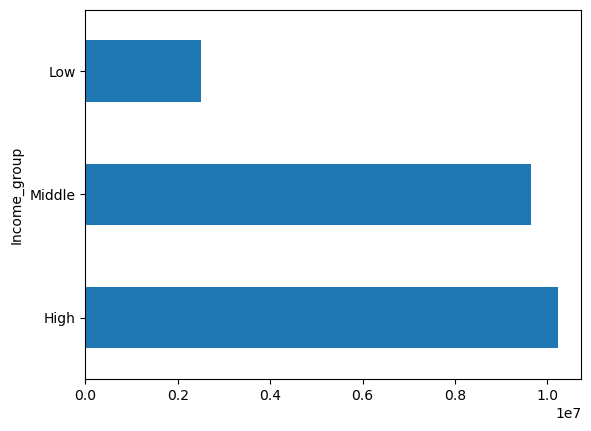

In [58]:
bar2 = merged_df_no_dups['Income_group'].value_counts().plot.barh()

In [59]:
# Saving as png
bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))

In [60]:
import gc
gc.collect

<function gc.collect(generation=2)>

In [ ]:
#creating dependants variable

In [61]:
# Assigning 'dependants_flag' values based on 'dependants'
merged_df_no_dups.loc[merged_df_no_dups['dependants'] == 0, 'dependants_flag'] = 'No Dependants'
merged_df_no_dups.loc[merged_df_no_dups['dependants'] > 0, 'dependants_flag'] = 'Has Dependants'

# Counting occurrences of each value in 'dependants_flag', including NaNs
merged_df_no_dups['dependants_flag'].value_counts(dropna=False)


dependants_flag
Has Dependants    16808390
No Dependants      5565296
Name: count, dtype: int64

In [62]:
#aggregate for dependent group order frequency

In [63]:
merged_df_no_dups.groupby('dependants_flag').agg({'days_since_prior_order':['mean','min','max']})

days_since_prior_order           
                                  mean  min   max
dependants_flag                                  
Has Dependants                   10.85 0.00 30.00
No Dependants                    10.84 0.00 30.00

In [64]:
# Grouping by 'dependants_flag' and aggregating the 'prices' column
merged_df_no_dups.groupby('dependants_flag').agg({'prices': ['mean', 'min', 'max']})


prices              
                  mean  min      max
dependants_flag                     
Has Dependants   11.59 1.00 99999.00
No Dependants    12.16 1.00 99999.00

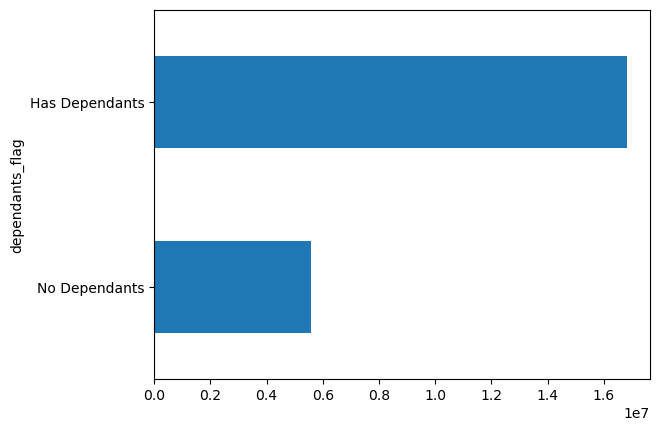

In [65]:
#number of dependants bar chart
bar3 = merged_df_no_dups['dependants_flag'].value_counts().sort_values().plot.barh()


In [66]:
# Saving as png
bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dependants_group.png'))

In [67]:
import gc
gc.collect

<function gc.collect(generation=2)>

In [ ]:
# Compare customer profiles with region and department data to identify potential correlations or patterns.

In [94]:
merged_df_no_dups['department_id'].value_counts()

department_id
4     6544216
16    3729863
19    1989600
7     1852976
1     1539871
13    1294236
3      812165
15     740214
20     725689
9      599165
17     509386
12     490094
14     488200
11     310043
18     292485
6      186104
5      105652
8       67107
21      47598
2       24981
10      24041
Name: count, dtype: int64

In [ ]:
# Define function to categorize department
def categorize_department(department_id):
    department_mapping = {
        1: "Frozen",
        2: "Other",
        3: "Bakery",
        4: "Produce",
        5: "Alcohol",
        6: "International",
        7: "Beverages",
        8: "Pets",
        9: "Dry goods pasta",
        10: "Bulk",
        11: "Personal care",
        12: "Meat, seafood",
        13: "Pantry",
        14: "Breakfast",
        15: "Canned goods",
        16: "Dairy Eggs",
        17: "Household",
        18: "Babies",
        19: "snacks",
        20: "Deli",
        21: "Missing"
        
   }
    return department_mapping.get(department_id, "Other") 

In [96]:
# Add a new column to the DataFrame with department names
merged_df_no_dups['department_name'] = merged_df_no_dups['department_id'].apply(categorize_department)

# Combine `department_id` and `department_name` into a single output
result = merged_df_no_dups[['department_id', 'department_name']].value_counts().reset_index()
result.columns = ['department_id', 'department_name', 'count']

# Sort result by count for clarity
result = result.sort_values(by='count', ascending=False)

# Display the result
print(result)

    department_id  department_name    count
0               4          Produce  6544216
1              16       Dairy Eggs  3729863
2              19           snacks  1989600
3               7        Beverages  1852976
4               1           Frozen  1539871
5              13           Pantry  1294236
6               3           Bakery   812165
7              15     Canned goods   740214
8              20             Deli   725689
9               9  Dry goods pasta   599165
10             17        Household   509386
11             12    Meat, seafood   490094
12             14        Breakfast   488200
13             11    Personal care   310043
14             18           Babies   292485
15              6    International   186104
16              5          Alcohol   105652
17              8             Pets    67107
18             21          Missing    47598
19              2            Other    24981
20             10             Bulk    24041


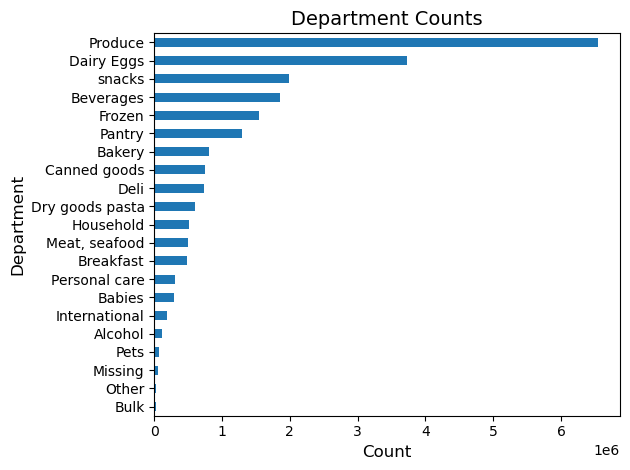

In [104]:
#creating bar chart
dept_bar=merged_df_no_dups['department_name'].value_counts().sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Department', fontsize=12)
plt.title('Department Counts', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis to display largest on top
plt.tight_layout()
plt.show()

In [106]:
# Saving as png
dept_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_product_bar.png')) 

In [107]:
#creating bar chart Age-Department Comparison
age_department_comparison=pd.crosstab(merged_df_no_dups['age_group'],merged_df_no_dups['department_name'],dropna=False)

Text(0.5, 1.0, 'Age-Department Comparison')

<Figure size 2500x2500 with 0 Axes>

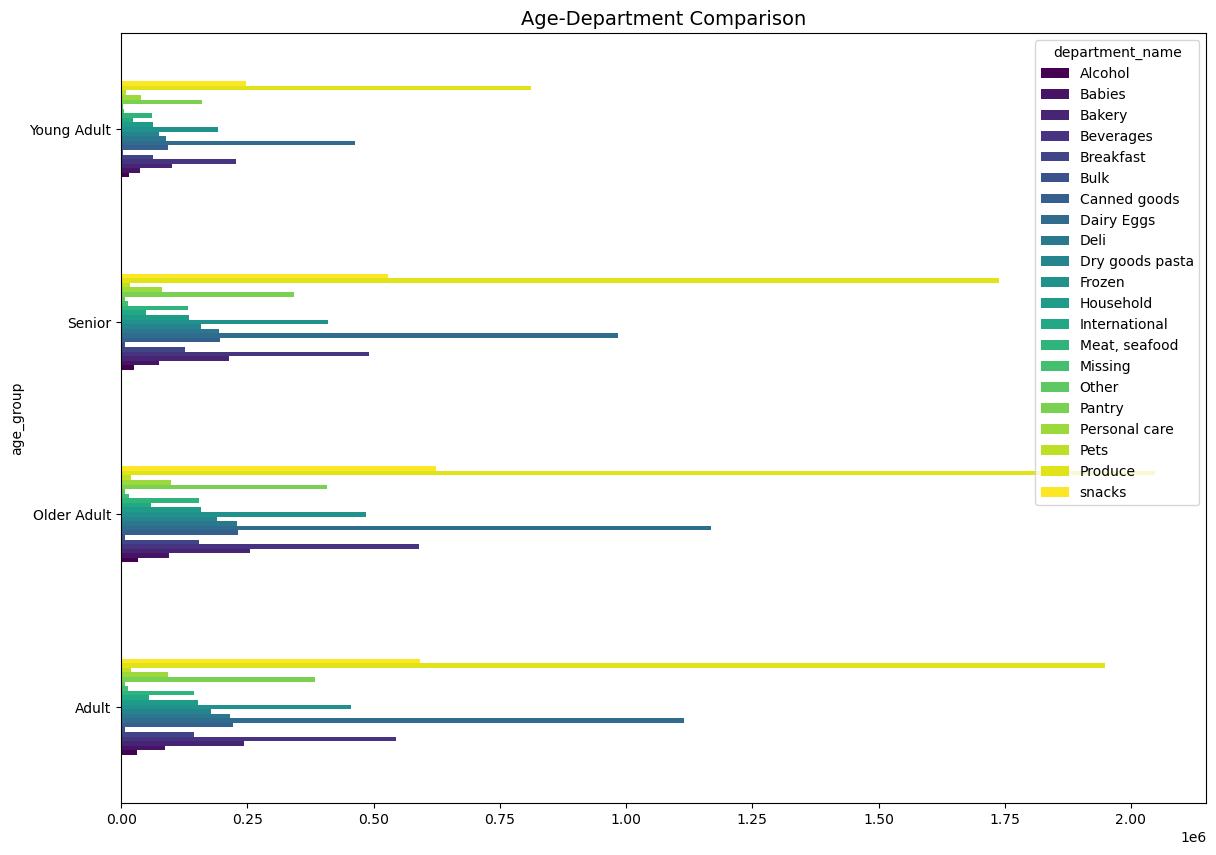

In [110]:
plt.figure(figsize=(25,25))
age_department_comparison_bar=age_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='viridis', rot=0)
plt.title('Age-Department Comparison', fontsize=14)

In [112]:
# Saving as png
age_department_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_department_comparison.png')) 

In [116]:
#creating bar chart Income-Department Comparison
income_department_comparison=pd.crosstab(merged_df_no_dups['Income_group'],merged_df_no_dups['department_name'],dropna=False)

Text(0.5, 1.0, 'Income-Department Comparison')

<Figure size 2500x2500 with 0 Axes>

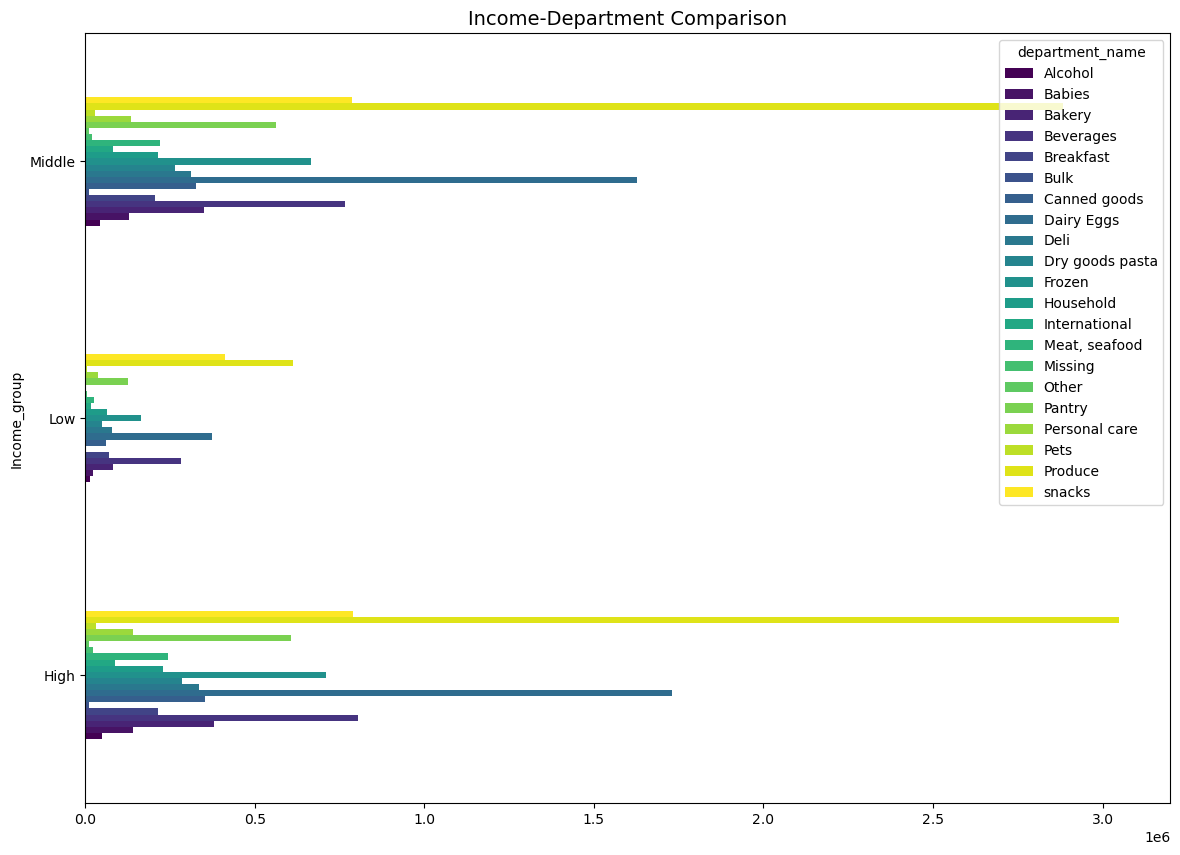

In [117]:
plt.figure(figsize=(25,25))
income_department_comparison_bar=income_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='viridis', rot=0)
plt.title('Income-Department Comparison', fontsize=14)

In [118]:
# Saving as png
income_department_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'income_department_comparison.png')) 

In [123]:
#creating bar chart Region-Department Comparison
region_department_comparison=pd.crosstab(small['region'],merged_df_no_dups['department_name'],dropna=False)

Text(0.5, 1.0, 'Region-Department Comparison')

<Figure size 2500x2500 with 0 Axes>

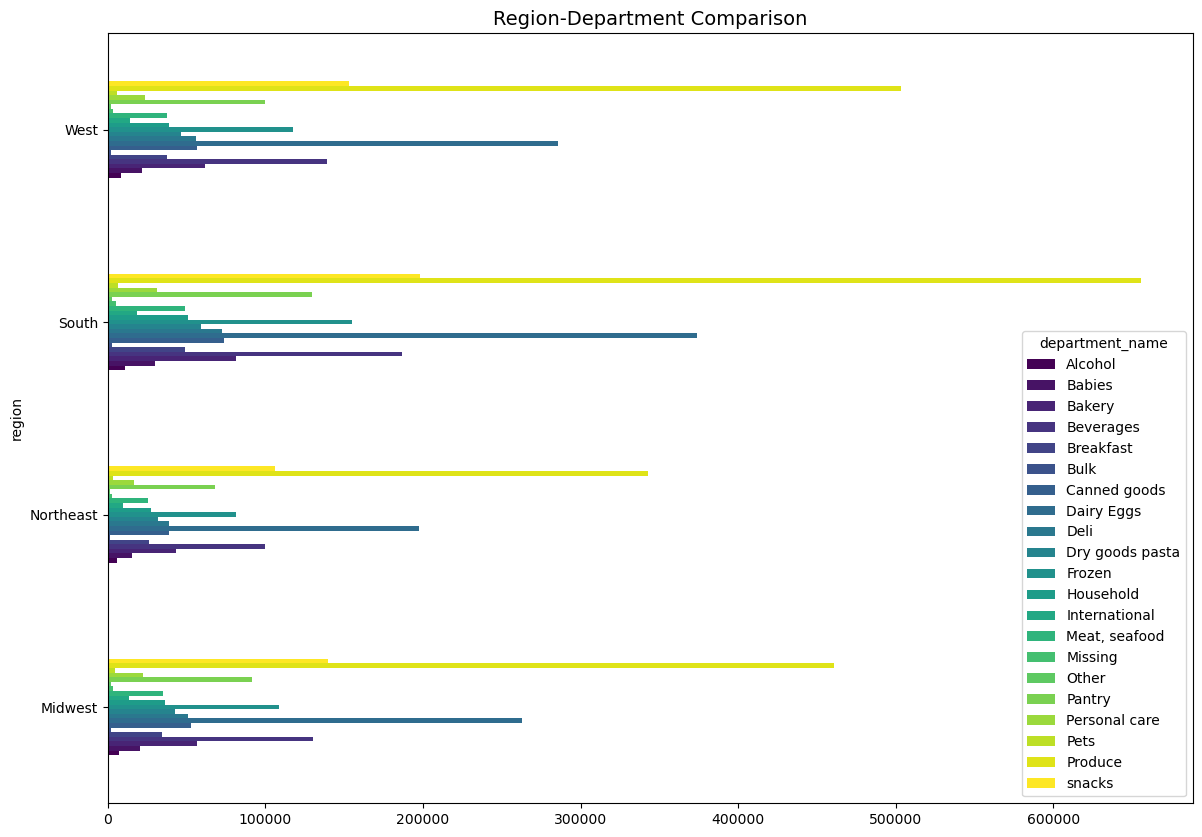

In [124]:
plt.figure(figsize=(25,25))
region_department_comparison_bar=region_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='viridis', rot=0)
plt.title('Region-Department Comparison', fontsize=14)

In [125]:
# Saving as png
region_department_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_department_comparison.png')) 

In [126]:
#creating bar chart Customer Loyalty-Department Comparison
loyalty_department_comparison=pd.crosstab(merged_df_no_dups['loyalty_flag'],merged_df_no_dups['department_name'],dropna=False)

Text(0.5, 1.0, 'Customer Loyalty-Department Comparison')

<Figure size 2500x2500 with 0 Axes>

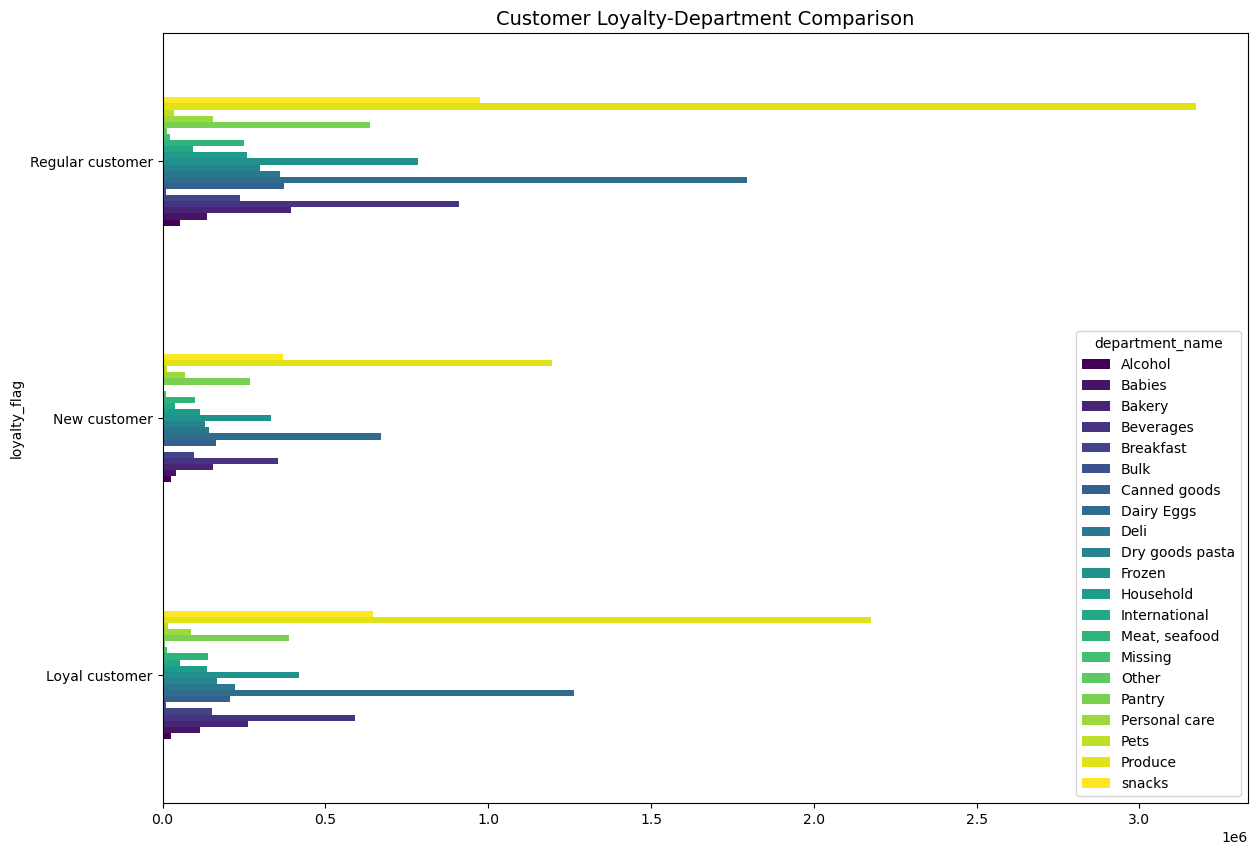

In [127]:
plt.figure(figsize=(25,25))
loyalty_department_comparison_bar=loyalty_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='viridis', rot=0)
plt.title('Customer Loyalty-Department Comparison', fontsize=14)

In [140]:
# Saving as png
loyalty_department_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_department_comparison.png')) 

In [128]:
#creating bar chart Family Status-Department Comparison
family_status_department_comparison=pd.crosstab(merged_df_no_dups['family_status'],merged_df_no_dups['department_name'],dropna=False)

Text(0.5, 1.0, 'Family Status-Department Comparison')

<Figure size 2500x2500 with 0 Axes>

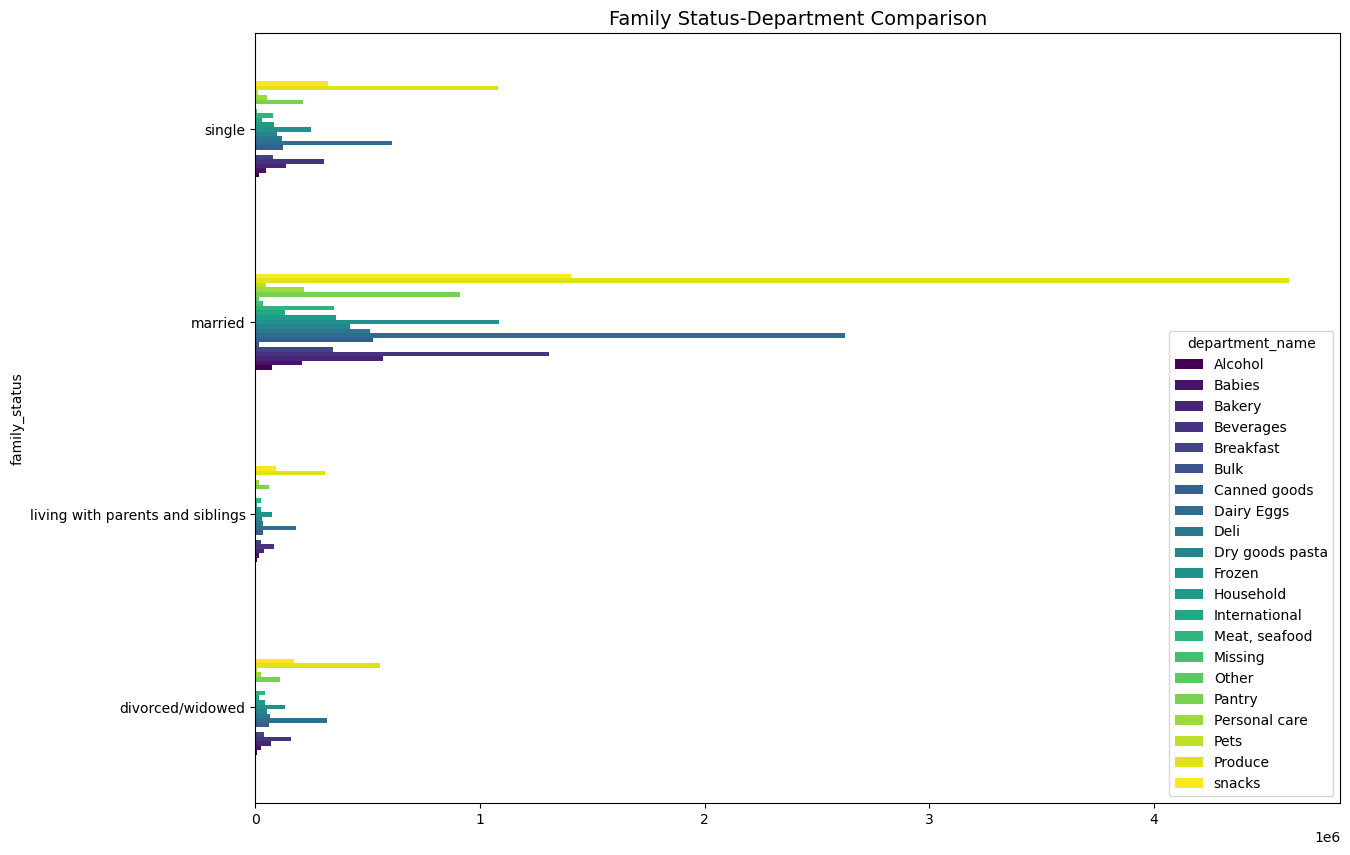

In [129]:
plt.figure(figsize=(25,25))
family_status_department_comparison_bar=family_status_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='viridis', rot=0)
plt.title('Family Status-Department Comparison', fontsize=14)

In [141]:
# Saving as png
family_status_department_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'family_status_department_comparison.png')) 

In [145]:
#creating bar chart Dependant-Department Comparison
dependant_department_comparison=pd.crosstab(merged_df_no_dups['dependants_flag'],merged_df_no_dups['department_name'],dropna=False)

Text(0.5, 1.0, 'Dependant-Department Comparison')

<Figure size 2500x2500 with 0 Axes>

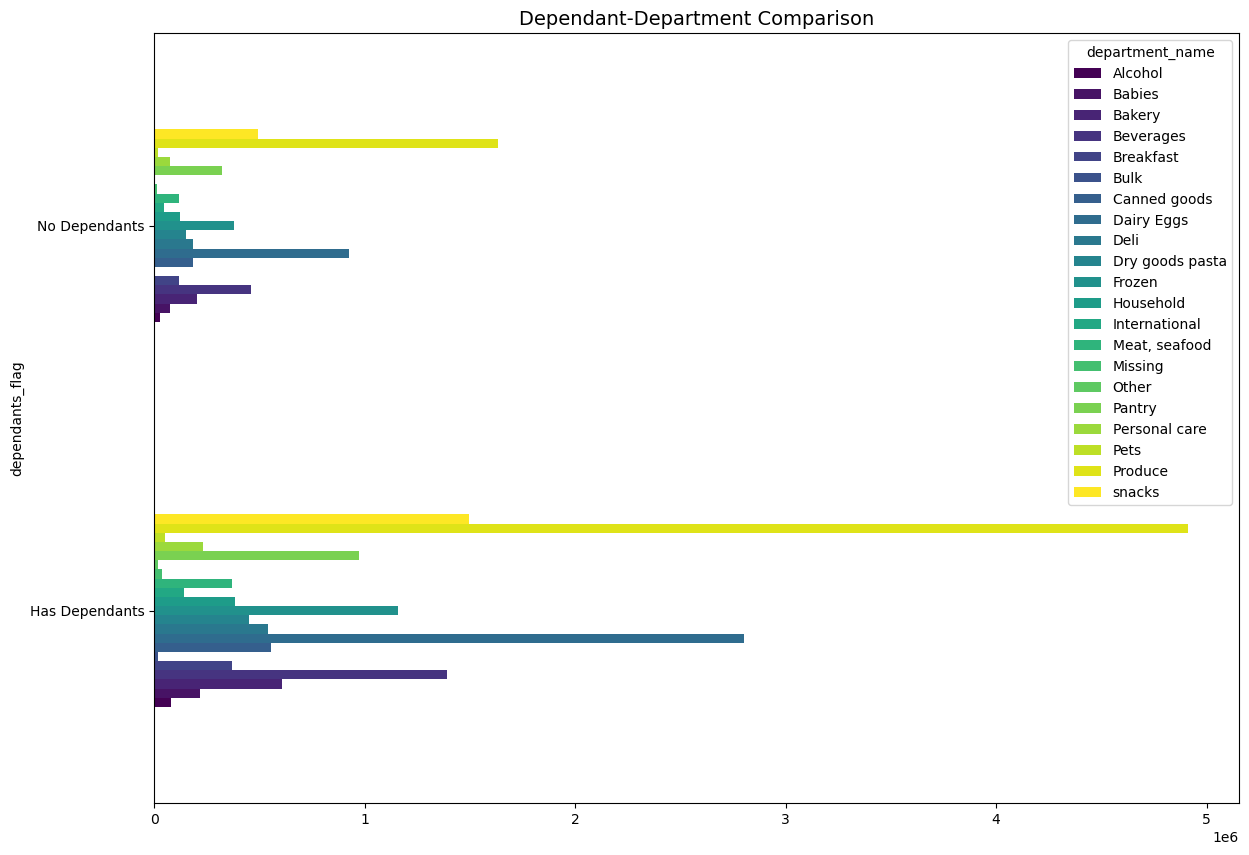

In [146]:
plt.figure(figsize=(25,25))
dependant_department_comparison_bar=depandant_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='viridis', rot=0)
plt.title('Dependant-Department Comparison', fontsize=14)

In [147]:
# Saving as png
dependant_department_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_department_comparison.png')) 

In [138]:
#creating bar chart Depandant-Age by Department Comparison
dependant_family_status_department_comparison = pd.crosstab(
    [merged_df_no_dups['dependants_flag'], merged_df_no_dups['age_group']],
    merged_df_no_dups['department_name'],
    dropna=False)

Text(0.5, 1.0, 'Depandant-Age by Department Comparison')

<Figure size 2500x2500 with 0 Axes>

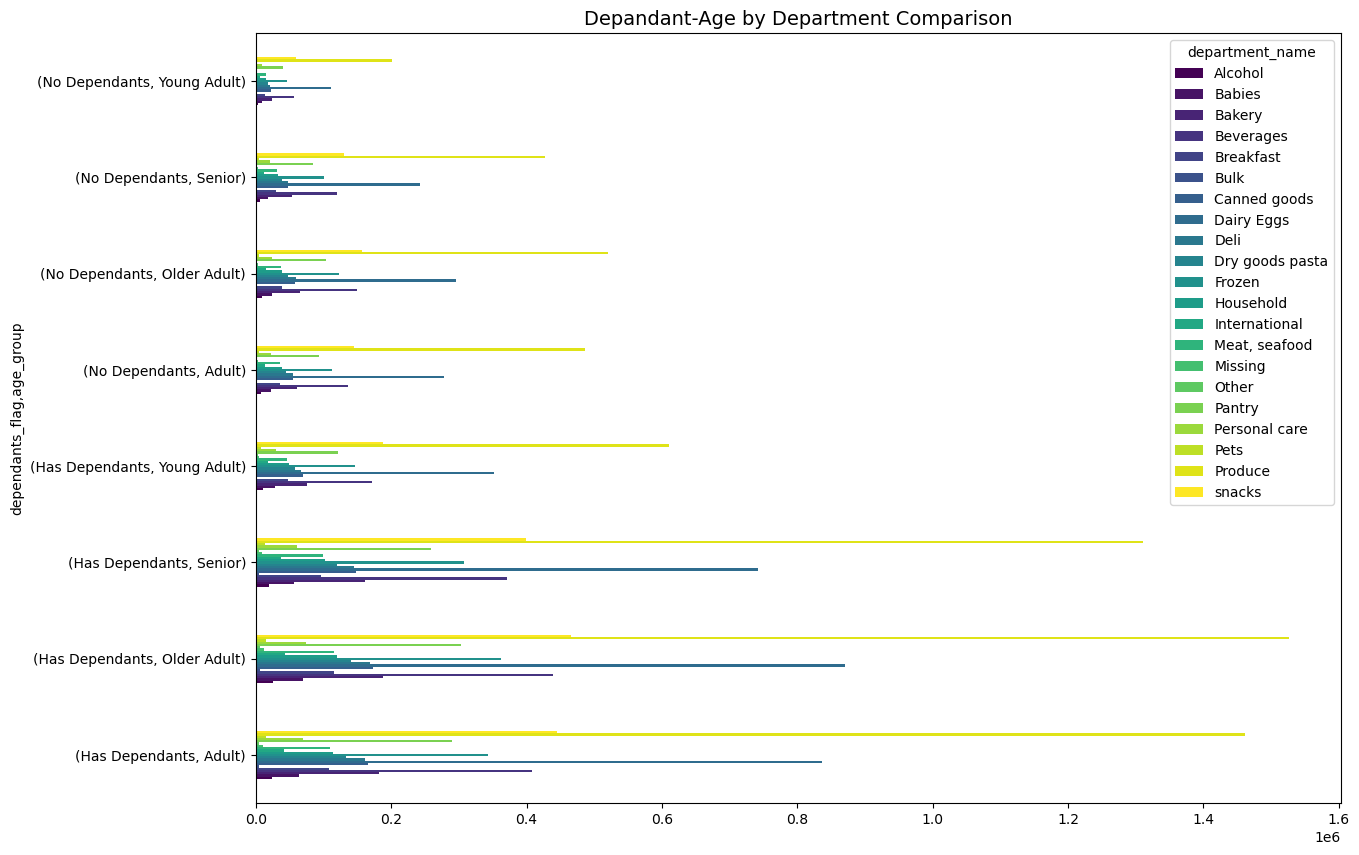

In [139]:
plt.figure(figsize=(25,25))
dependant_family_status_department_comparison_bar=dependant_family_status_department_comparison.plot(kind='barh', figsize=(14, 10), colormap='viridis', rot=0)
plt.title('Depandant-Age by Department Comparison', fontsize=14)

In [148]:
# Saving as png
dependant_family_status_department_comparison_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dependant_family_status_department_comparison.png')) 

In [149]:
#export final data set
merged_df_no_dups.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'final.pkl'))